<a href="https://colab.research.google.com/github/qas95/Machine-Learning/blob/Deep-Learning/GLM_Using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(123)
import pandas as pd


In [ ]:
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

In [ ]:
## Creating random data to run
# Populating X
N = 1000  # number of records
D = 10 # parameters/columns

X = np.random.randn(N, D-1) # (Leaving one to add the intercept)
intercept = np.ones(N).reshape(N, 1) 

#adding the intercept and X together
X = np.concatenate((intercept, X), axis = 1)

In [ ]:
# Produce True Beta values
beta = np.random.randn(D)

In [ ]:
np.random.seed(123)
## Produce Y as a function of X and Beta and keeping the distribution of Y as Bernouli

#Sigmoid to give out the probabilities
def sigmoid(x):
    return 1/(1 + np.exp(-x))


p = sigmoid(X @ beta)

#np.random.binomial(1,[0.2,0.56])
y = np.random.binomial(1, p)

In [ ]:
## Optimizing using Gradient Descent

nruns = 10**5
learning_rate = 0.0001


#Initialize random estimates for Beta and P hats
beta_hat = np.random.randn(D) # Estimated Beta Params before GD
p_hat = sigmoid(X @ beta_hat) # Estimated Y before GD

In [ ]:
#p_hat[1]
# Negative Log likelihood as Loss function

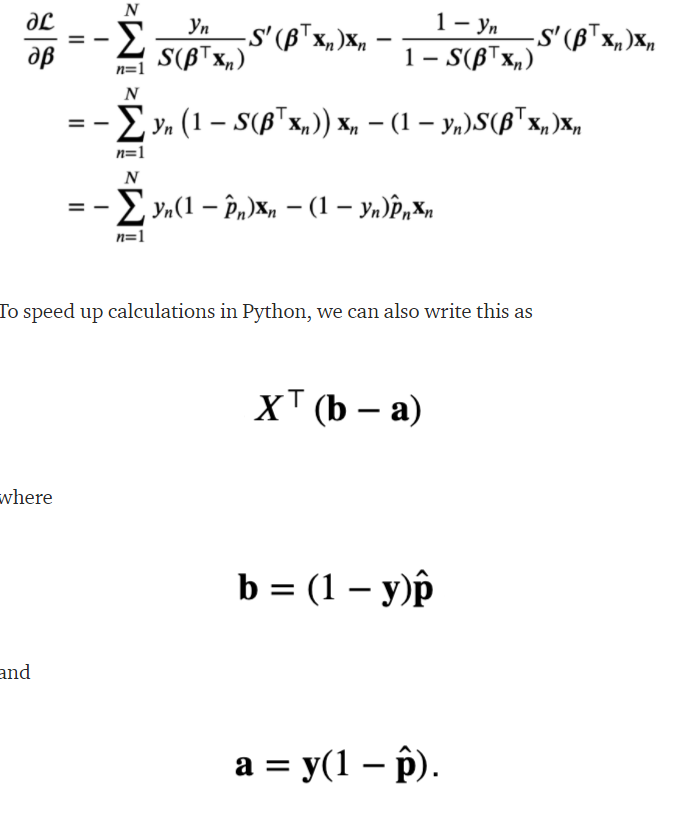


In [ ]:
#The above picture shows why A and B were calculated this way.

In [ ]:

for run in range(nruns):
    # get gradient 
    a, b = y*(1-p_hat), (1-y)*p_hat 
    grad = X.T @ (b-a)
    # adjust beta hats
    beta_hat -= learning_rate*grad
    # adjust p hats
    p_hat = sigmoid(X @ beta_hat)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


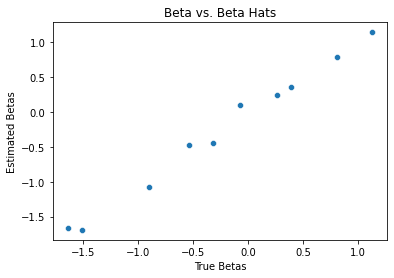

In [ ]:
## PLOT ##
fig, ax = plt.subplots()
sns.scatterplot(beta, beta_hat)
ax.set(xlabel = 'True Betas', ylabel = 'Estimated Betas', title = 'Beta vs. Beta Hats');